# Imports

In [1]:
#fixing the seed
from numpy.random import seed
seed(888)
from tensorflow.random import set_seed
set_seed(404)

In [2]:
import os
import numpy as np
import tensorflow as tf

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from IPython.display import display
from keras.preprocessing.image import array_to_img
from keras.callbacks import TensorBoard

from time import strftime

from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt

%matplotlib inline

# Constants

In [3]:
LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT #resolution of image 
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS #total number of neurons in input layer
NR_CLASSES = 10 #total no of categories 

VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

LOG_DIR = 'D:/tensorboard_cifar_logs/'

# Gathering the data

In [4]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

# Explore the data

In [5]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
y_train_all.shape

(50000, 1)

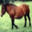

In [7]:
pic = x_train_all[7]
display(array_to_img(pic))

In [8]:
y_train_all[7][0]

7

In [9]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

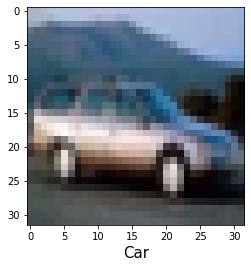

In [10]:
plt.imshow(x_train_all[4])
plt.xlabel(LABEL_NAMES[y_train_all[4][0]],fontsize=15)
plt.show()

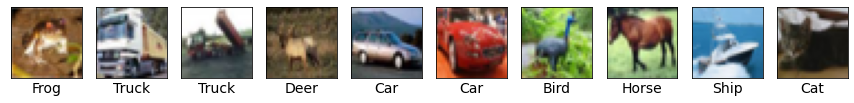

In [11]:
plt.figure(figsize=(15,5))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize=14)
    plt.imshow(x_train_all[i])

In [12]:
x_train_all[0].shape #32*32 pixel image in RGB color channels

(32, 32, 3)

In [16]:
x_train_all.shape #50k entries of 32*32 pixel images in 3 color channels (RGB)

(50000, 32, 32, 3)

In [14]:
nr_images, x,y,c = x_train_all.shape
print(f'Images = {nr_images}\t| width={x}\t| height={y}\t| channels={c}')

Images = 50000	| width=32	| height=32	| channels=3


In [15]:
x_test.shape

(10000, 32, 32, 3)

# Preprocess the data

In [17]:
x_train_all[0] #first image

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [18]:
x_train_all[0][0] # topmost row of pixels

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

In [19]:
x_train_all[0][0][0] # top left corner pixel with RGB values

array([59, 62, 63], dtype=uint8)

In [20]:
x_train_all[0][0][0][0] # the R value of the top left corner pixel

59

In [21]:
type(x_train_all[0][0][0][0]) # here we see that it is an unsigned integer of 8 bits (ie it is a positive number)

numpy.uint8

In [22]:
x_train_all, x_test = x_train_all / 255.0, x_test / 255.0
# We accomplish 2 things 
# 1- we converted it into float for easier calculations 
# 2- we can scale it for easier learning of our neural network bw 0 and 1 so that the network calibrates faster

In [23]:
type(x_train_all[0][0][0][0]) # now we have converted it into float

numpy.float64

In [24]:
x_train_all[0][0][0][0] # which is equal to 59/255

0.23137254901960785

In [25]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)

In [26]:
x_train_all.shape

(50000, 3072)

In [27]:
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)
print(f'Shape of x_test is {x_test.shape}')

Shape of x_test is (10000, 3072)


In [28]:
x_test.shape

(10000, 3072)

We create a validation set to see how our model performs and perform any tweaks to it if needed. This saves our testing dataset for the final evaluation and our best model will see the test dataset

# Create validation dataset

In [29]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 3072)

In [30]:
x_val.shape

(10000, 3072)

In [31]:
y_val.shape

(10000, 1)

In [32]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
x_train.shape

(40000, 3072)

In [33]:
x_train.shape

(40000, 3072)

### Create a small dataset to simulate training so that we do not slow down our computers too much

In [34]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

#### Steps of building the tensorflow model

1. Defining the model - Defining the structure of the model, declaring the number of neurons in each layer <br>
2. Compiling the model - We declare the loss functions and the accuracy/loss metrics here here <br>
3. Training/fitting the model -  Calibrate the model so that the weights and biases are calculated and the model can make predictions<br>

We do not have to provide the input layer to Keras, it figures out the input layer by itself by looking at the inputs to the first hidden layer. Eg if the input_shape for 1st hidden layer is 10, we can say that the input layer will have 10 neurons 

```python
# function to create the input layer
Dense(units=6, input_dim = 32*32*3, activation='relu')
# Here since it is the first hidden layer, it will recieve 32*32*3 inputs for each pixel in the image
# Here loss function describes how the neurons will calibrate the weights and biases for the model
# from second layer onwards we do not have to specify the input_dim as keras will pick it up from the first layer
# function to create second hidden layer
Dense(units=5, activation='relu')
For final output layer, we use the softmax activation function
# function to create output layer 
Dense(units=4, activation='softmax')
```

### Activation functions
This function models the state of the neuron<br>
Earlier people thought that the neuron can either be completely activated or completely deactivated, so they modelled the stepwise activation function<br>
<img src="https://lh6.googleusercontent.com/5ic1C5kqtX3TN9LM9my7CeJl6XlThezNFTJtWH_kJBx3BAB1WDXFNQ1mtdMqNlKnMg51X29M_6g5VFwa2aQoWjlDz2TdeKYf4EHsp0rOGnIzrY-e4HcMkkV8Kowarxnvg_ukRqHpYHwMp0LNIQ"><br>
<b>stepwise function</b><br>
Equation of stepwise function 
$1 -> activated\\
0 -> deactivated$<br>
<br>
Then people realized that the neuron can be partially activated also and the activation state can have values between 0 and 1 so people created a new function named sigmoid function<br>
<img src="https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png"><br>
<b>sigmoid activation function</b><br>
Equation of sigmoid function <br>
$\phi_x = \frac{1}{1+e^{-x}}$ <br>
By using the sigmoid function, a neuron can either be fully activated or it can be partially activated or deactivated<br>
<br>
ReLU function - Rectified Linear Output function<br>
<img src="https://www.researchgate.net/profile/Hossam-H-Sultan/publication/333411007/figure/fig7/AS:766785846525952@1559827400204/ReLU-activation-function.png"><br>
<br>
We use softmax activation function for our outputs because softmax function transforms our output into probability so that it is easier to make predictions and it rescales our outputs between 0 and 1<br>
<br>
<a href="https://keras.io/api/layers/activations/">More Activation Functions</a>

# Define the neural network using Keras

In [35]:
# model declaration 
model_1 = Sequential([ #declare a sequential model
    Dense(units=128, input_dim=TOTAL_INPUTS, activation='relu', name='m1_hidden1'),
    #first hidden layer has 128 neurons and it recieves inputs from 32*32*3 neurons and has relu activation function
    Dense(units=64, activation='relu', name='m1_hidden2'), #second hidden layer has 64 neurons and has relu activation function
    Dense(16, activation='relu', name='m1_hidden3'),#third hidden layer has 16 neurons and relu activation function
    Dense(10, activation='softmax', name='m1_output') #the output layer has 10 neurons as it is predicting 10 categories and it has softmax activation function (as softmax function outputs probabilities which are bw 0 and 1 and sum up to 1)
])
#model compilation
model_1.compile(optimizer='adam', #compile the model using adam optimizer 
                loss='sparse_categorical_crossentropy', #use the sparse categorical cross entropy loss function which is a more computationally efficient version of categorical cross entropy function 
                metrics=['accuracy']) #we output accuracy metric

In [36]:
model_2 = Sequential() #declare a sequential model 
model_2.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,))) #add a dropout layer of 20% probability and which recieves input from 32*32*3 neurons 
model_2.add(Dense(128, activation='relu', name='m2_hidden1'))#add a dense layer which has 128 neurons and it recieves inputs from 32*32*3 neurons and has relu activation function
model_2.add(Dense(64, activation='relu', name='m2_hidden2')) #add a dense layer which has 64 neurons and has relu activation function
model_2.add(Dense(15, activation='relu', name='m2_hidden3')) #add a dense layer which has 16 neurons and relu activation function
model_2.add(Dense(10, activation='softmax', name='m2_output'))#the output layer has 10 neurons as it is predicting 10 categories and it has softmax activation function (as softmax function outputs probabilities which are bw 0 and 1 and sum up to 1)

model_2.compile(optimizer='adam', #compile the model using adam optimizer 
                loss='sparse_categorical_crossentropy', #use the sparse categorical cross entropy loss function which is a more computationally efficient version of categorical cross entropy function
                metrics=['accuracy'])#we output accuracy metric

Now to compile our model, we need to specify loss functions also, here we are not doing regression so mean squared error loss function would not work, hence we use the Categorical Cross Entropy loss function  <br>
While graphing Categorical Cross Entropy functoion, we plot Predicted Probability on the X axis and the Cost incurred on the Y axis<br>
<br><br>
$CE = -\Sigma{y_i \log \hat{y}_i}$<br>
In this formula we sum up the actual label times the Predicted Probability for each category

# Optimizer 
Algorithm that calculate the loss and adjusts the weights 

Shortcomings of gradient descent <br>
1. It is slow <br>
2. It converges on local minima instead of global minima which may lead to inaccurate results <br>


We will use adam Optimizer as it is computationally efficient and has low memory requirements 

# Compiling the model

In [37]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [38]:
(32*32*3*128 + 128) + (128*64 + 64) + (64*16+16) + (16*10 + 10)
# Number of inputs times the number of neurons in the layer + numver of neurons in the layer for each layer

402810

# Tensorboard (Visualizing learning)

In [39]:
def get_tensorboard(model_name):

    folder_name = f'{model_name} at {strftime("%H %M")}'
    dir_paths = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Successfully created directory')

    return TensorBoard(log_dir=dir_paths)

# Fit the model

In [40]:
samples_per_batch = 1000

In [41]:
%%time
nr_epochs = 100
model_1.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 1 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
Wall time: 1min 59s


To use tensorboard execute this command 

```
tensorboard --logdir=D:\tensorboard_cifar_logs
```

In [42]:
%%time
nr_epochs = 100
model_2.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 2 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
Wall time: 1min 35s


In [43]:
model_3 = Sequential() #create a sequential model 
model_3.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,))) #add a dropout layer with 20% probability of dropout and which recieves input from 32*32*3 neurons 
model_3.add(Dense(128, activation='relu', name='m3_hidden1')) #add a hidden layer of 128 neurons which uses relu activation function 
model_3.add(Dropout(0.25, seed=42)) #add a dropout layer with 25% probability 
model_3.add(Dense(64, activation='relu', name='m3_hidden2')) #add a hidden layer of 64 neurons which uses relu activation function 
model_3.add(Dense(15, activation='relu', name='m3_hidden3')) #add a hidden layer of 15 neurons which uses relu activation function 
model_3.add(Dense(10, activation='softmax', name='m3_output')) #add an output layer which uses softmax activation function as softmax activation function outputs probabilities  

model_3.compile(optimizer='adam', #compile the model using adam optimizer 
                loss='sparse_categorical_crossentropy', #using sparse categorial cross entropy loss function 
                metrics=['accuracy']) #we measure accuracy

In [44]:
%%time
nr_epochs = 100
model_1.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 1 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
Wall time: 1min 31s


In [45]:
%%time
nr_epochs = 100
model_2.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 2 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
Wall time: 1min 32s


In [47]:
%%time
nr_epochs = 100
model_3.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 3 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
Wall time: 1min 26s


Adding data makes more improvement and reduces overfitting 
Adding dropouts also improves the model

# Making Predictions 

In [48]:
x_val[0].shape

(3072,)

In [49]:
test = np.expand_dims(x_val[0], axis=0)
test.shape

(1, 3072)

In [50]:
np.set_printoptions(precision=3)

In [51]:
model_2.predict(test)

array([[7.965e-03, 1.093e-02, 3.286e-02, 2.050e-01, 7.669e-02, 9.547e-02,
        5.599e-01, 9.573e-03, 8.468e-05, 1.585e-03]], dtype=float32)

In [52]:
model_2.predict(test).sum() #to prove that, the sum = 1

1.0

In [53]:
model_2.predict(x_val)

array([[7.965e-03, 1.093e-02, 3.286e-02, ..., 9.573e-03, 8.468e-05,
        1.585e-03],
       [3.262e-02, 7.252e-01, 4.535e-03, ..., 1.852e-03, 3.928e-02,
        1.488e-01],
       [3.817e-02, 2.219e-02, 7.362e-03, ..., 1.210e-02, 5.803e-02,
        8.452e-01],
       ...,
       [3.759e-02, 3.511e-01, 1.903e-03, ..., 5.854e-03, 2.746e-02,
        5.617e-01],
       [2.472e-01, 2.695e-01, 6.436e-02, ..., 3.400e-02, 1.342e-03,
        1.119e-01],
       [1.821e-04, 8.633e-06, 4.377e-02, ..., 7.303e-01, 1.868e-05,
        6.186e-05]], dtype=float32)

In [54]:
model_2.predict(x_val).shape

(10000, 10)

In [55]:
np.argmax(model_2.predict(test), axis=-1)

array([6], dtype=int64)

In [56]:
y_val[0]

array([6], dtype=uint8)

In [57]:
#predicting first 10 images 
for i in range(10):
    test_img = np.expand_dims(x_val[i], axis=0)
    predicted_val = np.argmax(model_2.predict(test),axis=-1)[0]
    print(f'Actual value: {y_val[i][0]} vs. predicted: {predicted_val}')

Actual value: 6 vs. predicted: 6
Actual value: 9 vs. predicted: 6
Actual value: 9 vs. predicted: 6
Actual value: 4 vs. predicted: 6
Actual value: 1 vs. predicted: 6
Actual value: 1 vs. predicted: 6
Actual value: 2 vs. predicted: 6
Actual value: 7 vs. predicted: 6
Actual value: 8 vs. predicted: 6
Actual value: 3 vs. predicted: 6


# Evaluating our model

In [58]:
model_2.metrics_names

['loss', 'accuracy']

In [61]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f'Test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1%}')

313/313 [==============================] - 1s 4ms/step - loss: 1.4461 - accuracy: 0.4936
Test loss is 1.45 and test accuracy is 49.4%


# Confusion matrix

In [62]:
predictions = np.argmax(model_2.predict(x_test),axis=-1)
conf_matrix = confusion_matrix(y_true = y_test, y_pred=predictions)

In [63]:
conf_matrix.shape

(10, 10)

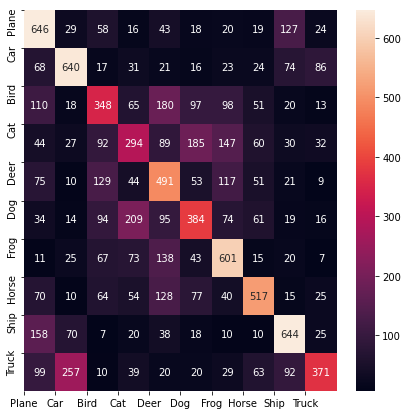

In [65]:
import seaborn as sns 
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(conf_matrix, ax=ax,annot=True,fmt='g')
tick_marks = np.arange(0, NR_CLASSES)
plt.xticks(tick_marks, LABEL_NAMES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.show()

1. Sum of all the columns (excluding the diagonal element for that particular category) is the false positive for our model for that category
2. Sum of all the rows (excluding the diagonal element for that particular category) false negatives for that category
3. The element on the diagonal on that category is the true positive for that particular category

In [66]:
true_positives = np.diag(conf_matrix)

In [67]:
true_positives

array([646, 640, 348, 294, 491, 384, 601, 517, 644, 371], dtype=int64)

In [68]:
recall = np.diag(conf_matrix)/np.sum(conf_matrix, axis=1)
print(f'Recall for every category is {recall}')

Recall for every category is [0.646 0.64  0.348 0.294 0.491 0.384 0.601 0.517 0.644 0.371]


In [69]:
precision = np.diag(conf_matrix)/np.sum(conf_matrix, axis=0)
print(f'Precision for every category is {precision}')

Precision for every category is [0.491 0.582 0.393 0.348 0.395 0.422 0.519 0.594 0.606 0.61 ]


In [70]:
avg_precision = np.mean(recall)
avg_recall = np.mean(precision)
print(f'Average recall score for model is {avg_precision:.3%}')
print(f'Average precision score for the model is {avg_recall:.3%}')

Average recall score for model is 49.360%
Average precision score for the model is 49.590%


In [71]:
f_score = 2*(avg_precision*avg_recall)/(avg_precision+avg_recall)
print(f'The F score for the model is {f_score:.3%}')

The F score for the model is 49.475%
